<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/211016_%EB%85%B8%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## GitHub에서 데이터셋 가져오기



In [33]:
from google.colab import files
import os
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_train_dataset.csv"
df = pd.read_csv(DATA_PATH)
df

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-08-31,20.5,18.1,23.1,77.4,2.3,77,93.3,0.0,21.2,17.8,78.2,82.0
1,2021-08-30,24.2,21.2,27.7,0.0,1.4,57,77.5,1.1,25.3,19.0,0.0,82.6
2,2021-08-29,23.7,21.9,26.3,0.9,1.6,65,82.6,1.0,24.3,19.1,0.9,79.3
3,2021-08-28,23.6,19.7,28.2,0.0,1.8,57,80.4,3.8,25.1,17.1,0.0,83.0
4,2021-08-27,22.4,20.4,25.5,0.9,1.3,67,83.5,0.0,23.1,17.6,0.9,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1007,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1008,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1009,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


In [34]:
DATA_PATH="https://raw.githubusercontent.com/urtbest86/MLOps/master/result_test_dataset.csv"
test = pd.read_csv(DATA_PATH)
test

,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito Value
0,2021-10-14,19.7,17.4,23.9,0.0,2.0,54,73.6,6.1,20.9,13.8,0.0,54.0
1,2021-10-13,19.6,14.9,25.2,0.0,2.4,52,66.6,9.0,19.3,11.0,0.0,43.2
2,2021-10-12,17.9,15.8,21.3,0.0,3.3,53,67.1,3.0,18.2,13.1,0.0,51.0
3,2021-10-11,15.2,12.6,17.8,0.3,2.2,67,78.6,1.7,18.0,12.3,0.3,63.1
4,2021-10-10,19.9,14.9,24.3,14.2,2.2,80,89.0,0.0,20.6,14.3,14.5,59.7
5,2021-10-09,20.9,18.5,24.1,0.4,2.3,72,83.5,1.9,20.5,16.4,14.6,61.1
6,2021-10-08,18.8,17.5,20.0,3.5,1.7,85,91.3,0.0,19.8,15.1,3.9,61.1
7,2021-10-07,19.4,17.9,21.9,4.6,1.9,74,85.5,0.0,20.6,15.2,8.1,73.9
8,2021-10-06,18.8,17.9,21.7,6.4,2.8,83,91.5,1.2,20.2,16.4,11.0,65.5
9,2021-10-05,23.6,21.7,26.5,0.0,3.3,65,82.4,1.5,23.2,20.8,0.0,58.4


In [35]:
train=df.sample(frac=0.8)
val=df.sample(frac=0.2)

In [36]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

val_data_set = val.values
x_val = val_data_set[:, 2:-1].astype(float)
y_val = val_data_set[:, -1].astype(float)

print(x_train)
print("===")
print(y_train)

[[17.1 26.5  2.5 ... 23.7 15.2 12. ]
 [18.  23.9  5.  ... 24.5 16.   5. ]
 [19.9 26.7  4.5 ... 25.  18.6 56.8]
 ...
 [11.8 16.1 32.  ... 14.6 11.2 32.5]
 [ 9.9 21.7  0.  ... 14.5  3.7  0. ]
 [26.9 36.6  0.  ... 33.8 25.6  0. ]]
===
[4.390e+01 5.640e+01 6.210e+01 1.910e+01 6.410e+01 4.490e+01 7.560e+01
 6.310e+01 5.690e+01 4.660e+01 1.910e+01 7.950e+01 3.820e+01 7.950e+01
 8.500e+01 6.590e+01 4.660e+01 8.650e+01 0.000e+00 1.830e+01 8.160e+01
 3.900e+00 7.050e+01 3.700e+01 5.920e+01 5.310e+01 4.880e+01 4.560e+01
 7.900e+01 2.400e+00 6.590e+01 5.290e+01 4.440e+01 3.250e+01 5.800e+01
 6.710e+01 4.640e+01 1.070e+01 1.240e+01 3.540e+01 6.900e+00 1.910e+01
 8.210e+01 1.000e+02 9.220e+01 2.060e+01 1.000e+02 2.830e+01 5.640e+01
 3.500e+00 4.260e+01 7.150e+01 6.480e+01 7.230e+01 8.200e+01 5.170e+01
 4.970e+01 4.400e+01 1.030e+01 4.560e+01 3.820e+01 2.490e+01 4.870e+01
 6.280e+01 1.370e+01 9.750e+01 5.390e+01 2.610e+01 4.170e+01 5.650e+01
 1.790e+01 6.990e+01 5.030e+01 1.500e+00 1.980e+01 6.440e+

### 모델 구성

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 10, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [38]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습 + 학습과정 및 결과보기

In [39]:
hist=model.fit(x_train, y_train, epochs=1000, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/1000
26/26 [==============================] - 1s 21ms/step - loss: 694.4031 - mae: 21.0802 - val_loss: 612.3632 - val_mae: 19.4834
Epoch 2/1000
26/26 [==============================] - 0s 15ms/step - loss: 513.2789 - mae: 18.3139 - val_loss: 514.0253 - val_mae: 18.0936
Epoch 3/1000
26/26 [==============================] - 0s 15ms/step - loss: 487.9535 - mae: 17.8451 - val_loss: 558.3091 - val_mae: 18.2393
Epoch 4/1000
26/26 [==============================] - 0s 14ms/step - loss: 477.6247 - mae: 17.5929 - val_loss: 536.5334 - val_mae: 18.0712
Epoch 5/1000
26/26 [==============================] - 0s 14ms/step - loss: 507.0932 - mae: 17.8985 - val_loss: 525.0560 - val_mae: 17.9699
Epoch 6/1000
26/26 [==============================] - 0s 14ms/step - loss: 476.1074 - mae: 17.2830 - val_loss: 475.6386 - val_mae: 17.4963
Epoch 7/1000
26/26 [==============================] - 0s 13ms/step - loss: 480.6898 - mae: 17.5214 - val_loss: 495.1620 - val_mae: 18.4392
Epoch 8/1000
26/26 [=======

### mae와 val_mae 비교

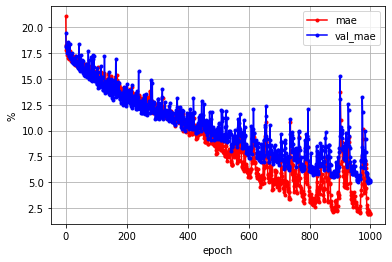

In [40]:
import matplotlib.pyplot as plt

y_mae = hist.history['mae']
y_val_mae = hist.history['val_mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mae, marker='.', c='red', label="mae")
plt.plot(x_len, y_val_mae, marker='.', c='blue', label="val_mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mse(loss)와 val_mse 비교

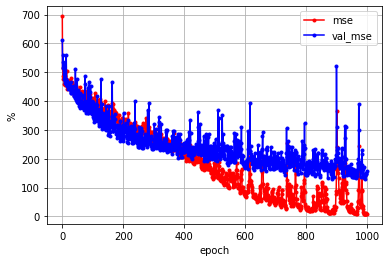

In [41]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_val_mse = hist.history['val_loss']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_val_mse, marker='.', c='blue', label="val_mse")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

### mae와 mse 비교

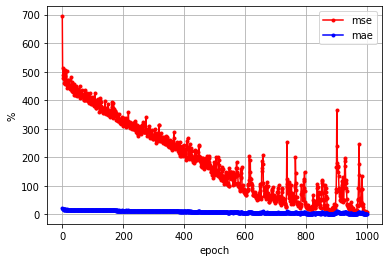

In [42]:
import matplotlib.pyplot as plt

y_mse = hist.history['loss']
y_mae = hist.history['mae']#x_len = np.arange(len(y_loss)) 

x_len = np.arange(1000)
plt.plot(x_len, y_mse, marker='.', c='red', label="mse")
plt.plot(x_len, y_mae, marker='.', c='blue', label="mae")

# plt.plot(x_len, hist.history['val_loss'], marker='.', c='green', label="val_mse")
# plt.plot(x_len, hist.history['val_mae'], marker='.', c='black', label="val_mae")

plt.legend(loc='upper right')
plt.grid()
#plt.xlim(0,150)
plt.xlabel('epoch')
plt.ylabel('%')
plt.show()

In [43]:
#print('## training loss and acc ##')
#print(hist.history['loss'])
#print(hist.history['mae'])

### 모델 평가

In [47]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2/2 [==============================] - 0s 7ms/step - loss: 432.6665 - mae: 16.7832
## evaluation loss and_metrics ##
[432.6665344238281, 16.783235549926758]


In [45]:
print(model.predict(x_test))
print(y_test)

[[54.002052]
 [51.47379 ]
 [72.48837 ]
 [60.560303]
 [62.128532]
 [71.66887 ]
 [66.75099 ]
 [57.809196]
 [69.60945 ]
 [54.89951 ]
 [82.51693 ]
 [42.49807 ]
 [55.35019 ]
 [34.564526]
 [21.720001]
 [65.28449 ]
 [42.883743]
 [49.70742 ]
 [55.463417]
 [71.05178 ]
 [58.7389  ]
 [48.36716 ]
 [13.178474]
 [38.034668]
 [54.79567 ]
 [68.96471 ]
 [52.557236]
 [72.96678 ]
 [51.14637 ]
 [47.321827]
 [70.815384]
 [44.136997]
 [36.90615 ]
 [48.880356]
 [59.914   ]
 [52.200893]
 [43.271576]
 [88.50888 ]
 [66.91603 ]
 [60.199154]
 [61.170128]
 [59.242073]
 [51.43959 ]
 [58.430965]]
[54.  43.2 51.  63.1 59.7 61.1 61.1 73.9 65.5 58.4 56.  57.7 54.7 60.7
 66.8 63.8 62.8 63.1 70.2 70.5 70.5 63.1 61.7 72.2 74.5 67.1 69.5 77.9
 79.9 79.9 71.8 71.5 76.2 76.2 71.5 76.9 71.5 70.2 74.5 76.6 73.9 79.6
 79.6 81.6]


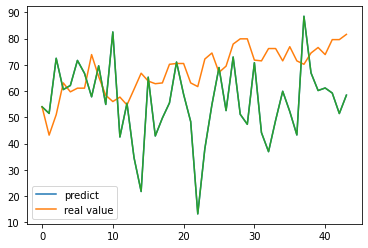

In [46]:
plt.plot(model.predict(x_test),label='predict')
plt.plot(y_test, label='real value')
plt.plot(model.predict(x_test))
# plt.plot(model.predict(x_test)-y_test)
#plt.xlim(0,20)
plt.legend()
plt.show()